In [1]:
import pandas as pd
import numpy as np
import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tqdm import tqdm
import talib

In [11]:
# 这里导入数据
df = pd.read_csv("../数据获取/聚宽数据/最新数据.csv")
df.columns = ['id','i', 'Date','Open','High','Low','Close','Volume']
df['id2'] =df['id'].shift()
df['i'] = range(len(df))
ids = list(df.loc[df['id'] != df['id2'], 'i']) # 这个是单个股票序号的起始。
ids.append(len(df)-1) # 添加最后1天。
df.head()

,id,i,Date,Open,High,Low,Close,Volume,id2
0,000001.XSHE,0,2018-12-24,8.91,8.96,8.83,8.93,53694517.0,NaN
1,000001.XSHE,1,2018-12-25,8.81,8.94,8.73,8.86,61867885.0,000001.XSHE
2,000001.XSHE,2,2018-12-26,8.87,8.93,8.79,8.82,44415942.0,000001.XSHE
3,000001.XSHE,3,2018-12-27,8.96,9.00,8.80,8.80,65873247.0,000001.XSHE
4,000001.XSHE,4,2018-12-28,8.83,8.97,8.83,8.89,60812019.0,000001.XSHE


In [12]:
# 因为股票的数量是变化的，我这里用百分比来看看。

In [13]:
df['up'] = df['Close']-df['Open']

In [14]:
df2 = df.loc[df['up']>0]
len(df2)

1696259

In [19]:
df3 = df.groupby('Date').agg(np.size)
df3

,id,i,Open,High,Low,Close,Volume,id2,up
Date,,,,,,,,,
2014-11-12,1,1,1,1,1,1,1,1,1
2014-11-13,1,1,1,1,1,1,1,1,1
2014-11-14,1,1,1,1,1,1,1,1,1
2014-11-17,1,1,1,1,1,1,1,1,1
2014-11-18,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2022-08-31,4273,4273,4273,4273,4273,4273,4273,4273,4273
2022-09-01,4272,4272,4272,4272,4272,4272,4272,4272,4272
2022-09-02,4274,4274,4274,4274,4274,4274,4274,4274,4274


In [21]:
df4 = df3.loc[:,['id']]
df4

,id
Date,
2014-11-12,1
2014-11-13,1
2014-11-14,1
2014-11-17,1
2014-11-18,1
...,...
2022-08-31,4273
2022-09-01,4272
2022-09-02,4274


In [27]:
df5 = df2.groupby('Date').agg(np.size)
df6 = df5.loc[:,['up']]
df6

,up
Date,
2014-11-12,1
2014-11-17,1
2014-11-18,1
2014-11-21,1
2014-11-24,1
...,...
2022-08-31,650
2022-09-01,1486
2022-09-02,3027


In [31]:
# 接下来要2个表合并
# df4和df6
df7 = df4.merge(df6, how='inner', left_index=True, right_index=True)
df7

,id,up
Date,,
2014-11-12,1,1
2014-11-17,1,1
2014-11-18,1,1
2014-11-21,1,1
2014-11-24,1,1
...,...,...
2022-08-31,4273,650
2022-09-01,4272,1486
2022-09-02,4274,3027


In [32]:
df7['ratio'] = (df7['up']/df7['id'])*100

In [36]:
df7.tail(20)

,id,up,ratio
Date,,,
2022-08-10,4271,2182,51.088738
2022-08-11,4270,3061,71.686183
2022-08-12,4271,1831,42.870522
2022-08-15,4269,2113,49.496369
2022-08-16,4271,2397,56.122688
2022-08-17,4270,2057,48.173302
2022-08-18,4271,1833,42.917350
2022-08-19,4271,1043,24.420510
2022-08-22,4270,2802,65.620609


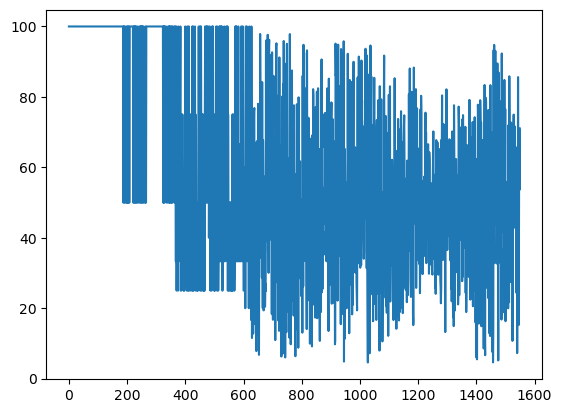

In [34]:
# 这里绘图
plt.plot(list(range(len(df7))), df7['ratio'])

这个好像意味着，并没有特别的规律，